<a href="https://colab.research.google.com/github/VeronikaShe/ML-study_HW_TimeSeries/blob/main/ARIMA_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для Python 3.10 следующий набор версий библиотек рабочий и не падает с ошибками при выполнении данного ноутбука:

<ul>
    <li>pandas==2.0.3</li>
    <li>numpy==1.24.4</li>
    <li>statsmodels==0.14.4</li>
    <li>matplotlib==3.10.0</li>
    <li>scipy==1.10.1</li>
    <li>statsmodels==0.14.4</li>
    <li>sklearn==1.6.1</li>
    <li>arch==7.2.0</li>
</ul>


# Модель ARIMA для предсказания временного ряда

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm
import statsmodels.api as sm
import statsmodels.tsa.api as smt

from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

In [9]:
%matplotlib inline

In [10]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [11]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [12]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)

        plt.tight_layout()
    return

In [22]:
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

## ARIMA (p,d,q)

ARIMA - естественное расширение модели ARMA. Как мы уже хорошо знаем - многие временные ряды не стационарны, но они могут такими стать в результате операции дифференцирования. В модели ARIMA "дифференцирование" (в количестве d-раз) вносится в саму модель


$\delta^p y_t = c + \sum_{i=1}^p a_i \delta^d y_{t-i} + \sum_{j=1}^q b_j \epsilon_{t-j} + \epsilon_t$

aic: 854.04921 | order: (4, 2, 3)
Results of Dickey-Fuller Test:
Test Statistic                 -1.923611
p-value                         0.321037
#Lags Used                     11.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


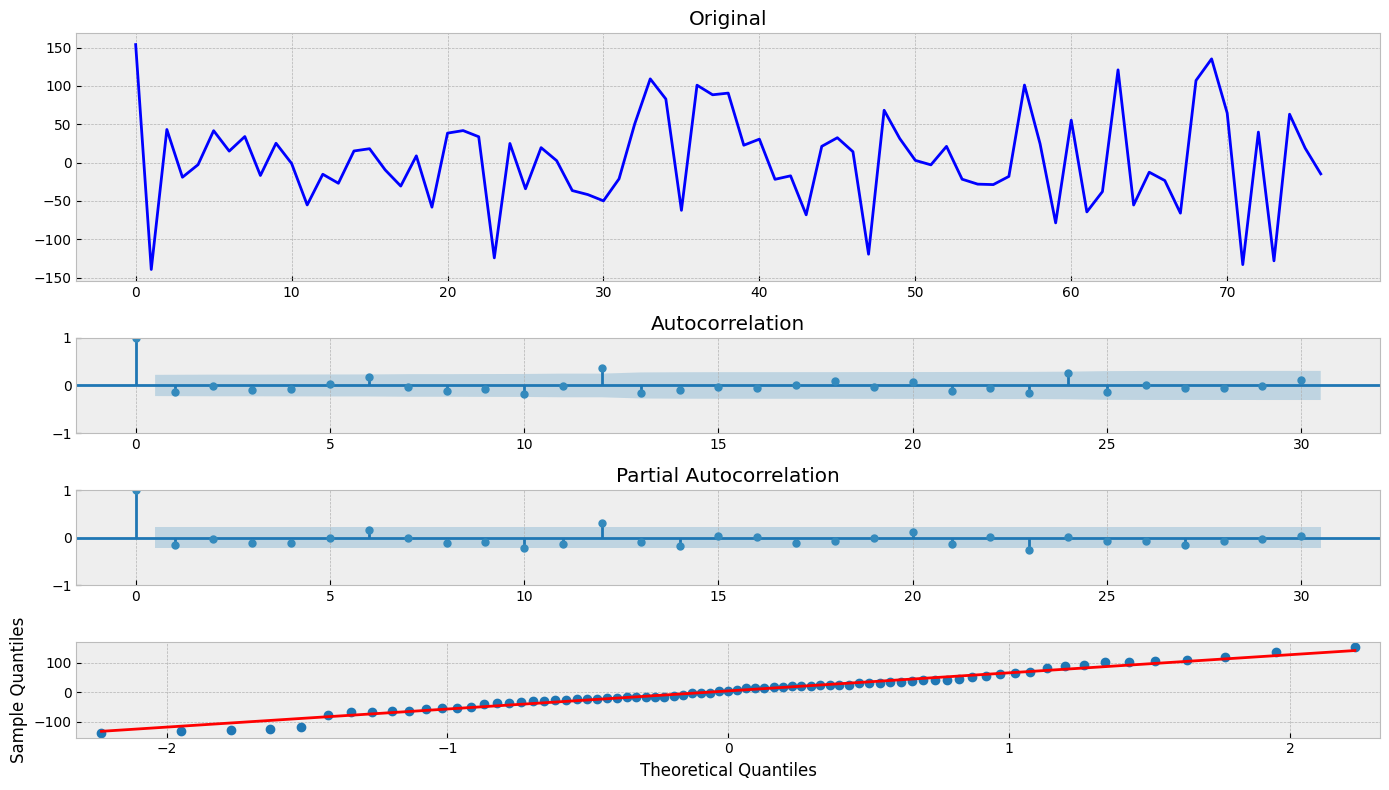

In [24]:

series = pd.read_csv("https://raw.githubusercontent.com/VeronikaShe/ML-study_HW_TimeSeries/refs/heads/main/monthly-sales-of-company-x-jan-6.csv")['Count']

best_aic = np.inf
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = ARIMA(series, order=(i, d, j), trend='n').fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except Exception as e:
                continue

print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

if best_mdl:
    tsplot(best_mdl.resid, lags=30)

In [25]:
best_mdl

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

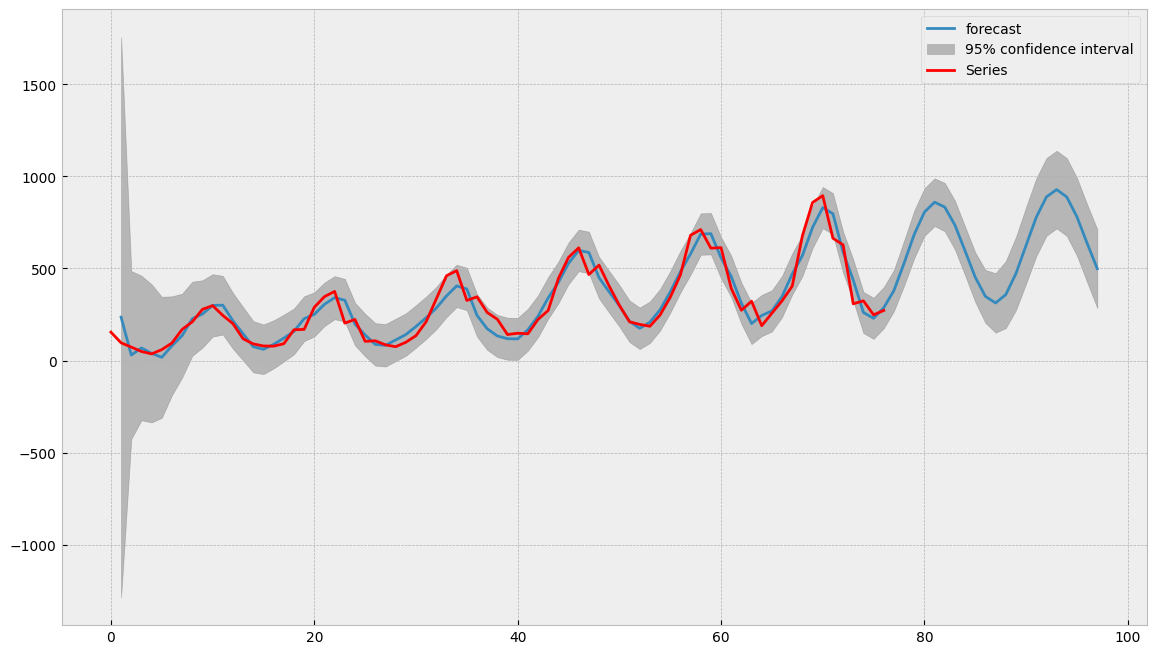

In [27]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    plot_predict(best_mdl, 1, len(series)+20, ax=ax)
    plt.plot(series, color='red', label='Series')
    plt.legend()
    plt.show()